# Lib

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# DA schema

In [ ]:
rawEx = pd.read_csv('/content/da_task_assign.csv').iloc[:25]

In [ ]:
rawEx['combined'] = rawEx.apply(lambda x: list([x['exampleFromPaper'],
                                                x['example1'],
                                                x['example2'],
                                                x['example3']]),axis=1)

In [ ]:
rawEx['combined'] = rawEx['combined'].apply(lambda x:[term for term in x if str(term) != 'nan'])

In [ ]:
role = ['Tutor', 'Tutor & Student', 'Tutor', 'Tutor & Student',
        'Tutor', 'Student','Tutor',
        'Tutor','Tutor & Student','Student',
        'Student','Tutor','Tutor',
        'Tutor','Tutor',
        'Tutor & Student', 'Tutor & Student','Tutor & Student',
        'Tutor & Student', 'Tutor & Student', 'Tutor & Student', 'Tutor & Student',
        'Tutor', 'Student', 'Student',]

In [ ]:
da = rawEx['DA']
sample = rawEx['combined']

In [ ]:
s = pd.DataFrame({"Dialogue Act": da, 'Speakers': role, 'Examples': sample})
sc = s.apply(lambda x: x.to_json(), axis=1).to_json()

# Visualization Single

In [ ]:
dir = 'Directory for one DA labeled transcript files'
dv = pd.read_csv(dir)

Text(0, 0.5, 'DA')

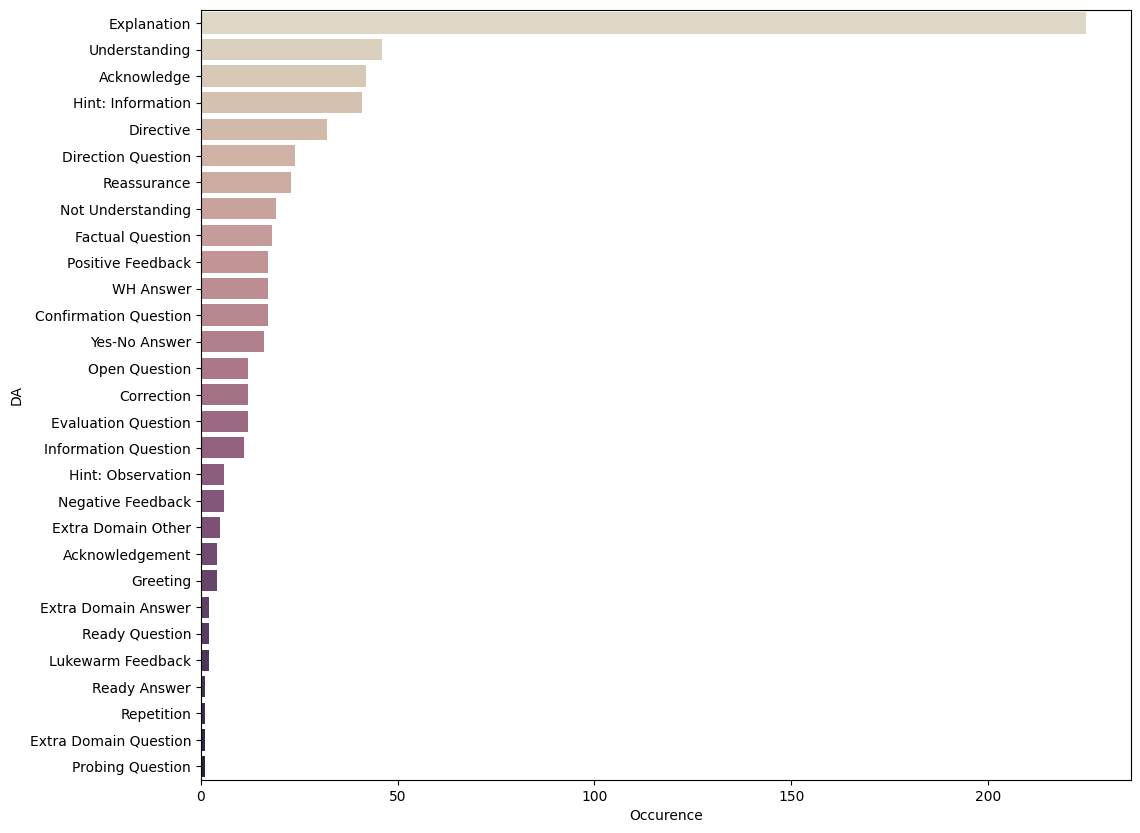

In [ ]:
ct = pd.Series(Counter(dv.DA))
ct = ct.sort_values(ascending = False)

plt.figure(figsize=(12, 10))
palette= sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
p = sns.barplot(x=ct.values, y=ct.index, hue = list(range(len(ct.index))), palette=palette, orient='h')
p.legend_.remove()
plt.xlabel("Occurence")
plt.ylabel("DA")

Text(0.5, 0, 'Utterance length')

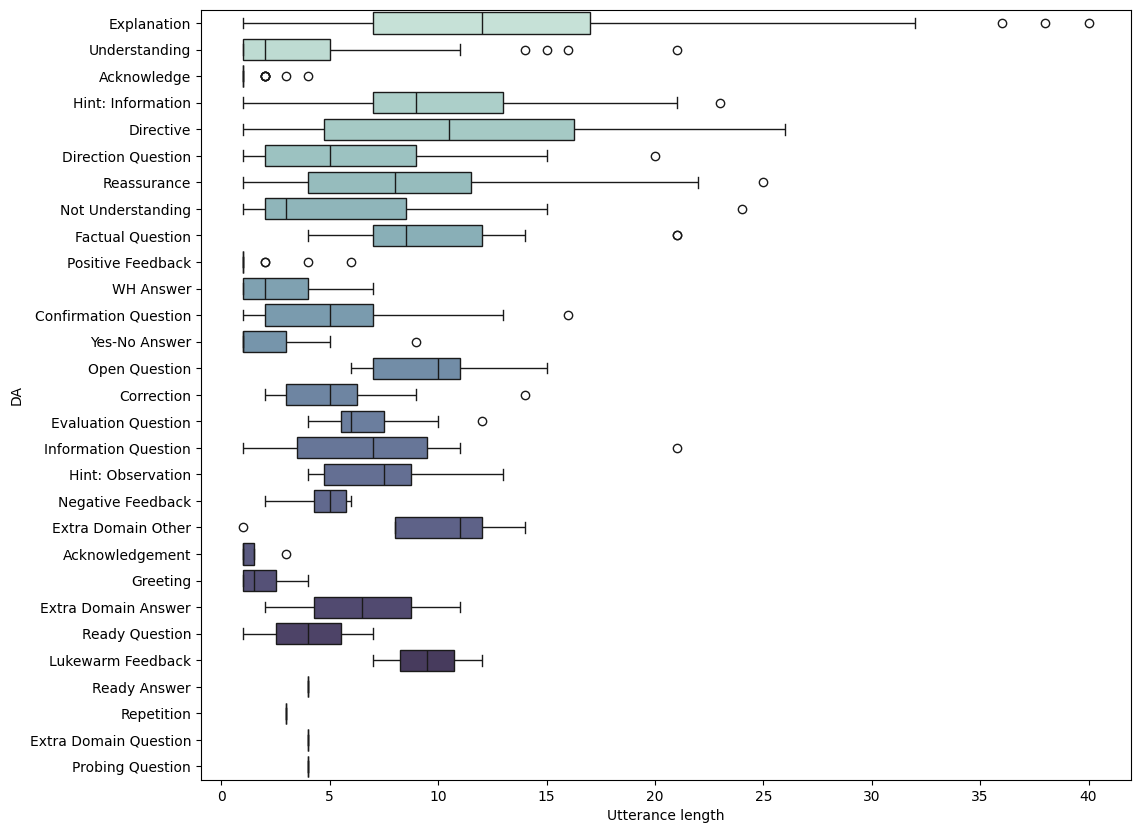

In [ ]:
utterance_lens = [len(utterance.split()) for utterance in dv['Utterance']]
utterance_lens = pd.Series(utterance_lens)
temp = dv.DA.replace({ct.index[i]: list(range(len(ct.index)))[i] for i in range(len(ct.index))})

plt.figure(figsize=(12, 10))
palette= sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
p = sns.boxplot(x=utterance_lens, y=dv.DA,  hue = temp, palette=palette,  orient='h', order = ct.index)
p.legend_.remove()
plt.xlabel("Utterance length")

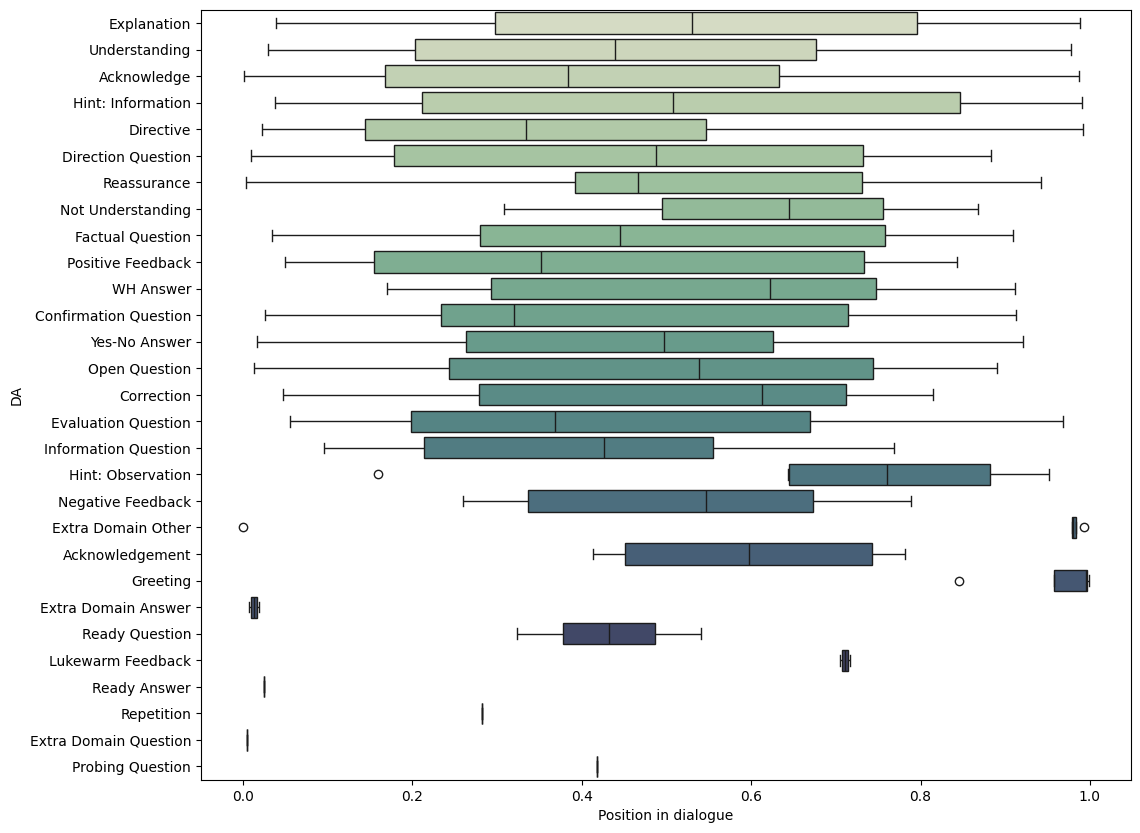

In [ ]:
position_in_dialogue = [i / len(dv.DA) for i in range(len(dv.DA))]

plt.figure(figsize=(12, 10))
palette= sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
p = sns.boxplot(x=position_in_dialogue, y=dv.DA, hue = temp, palette=palette, orient='h', order = ct.index)
p.legend_.remove()
plt.xlabel("Position in dialogue");

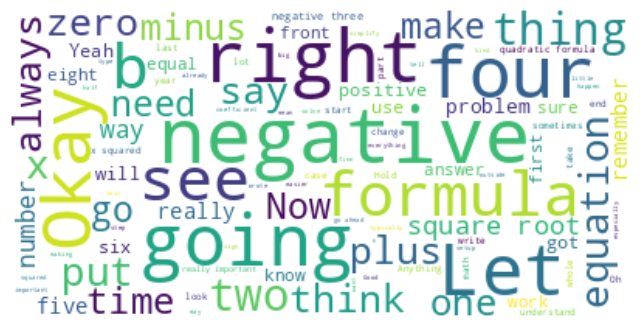

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(8, 6))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(
    " ".join(dv['Utterance'])
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

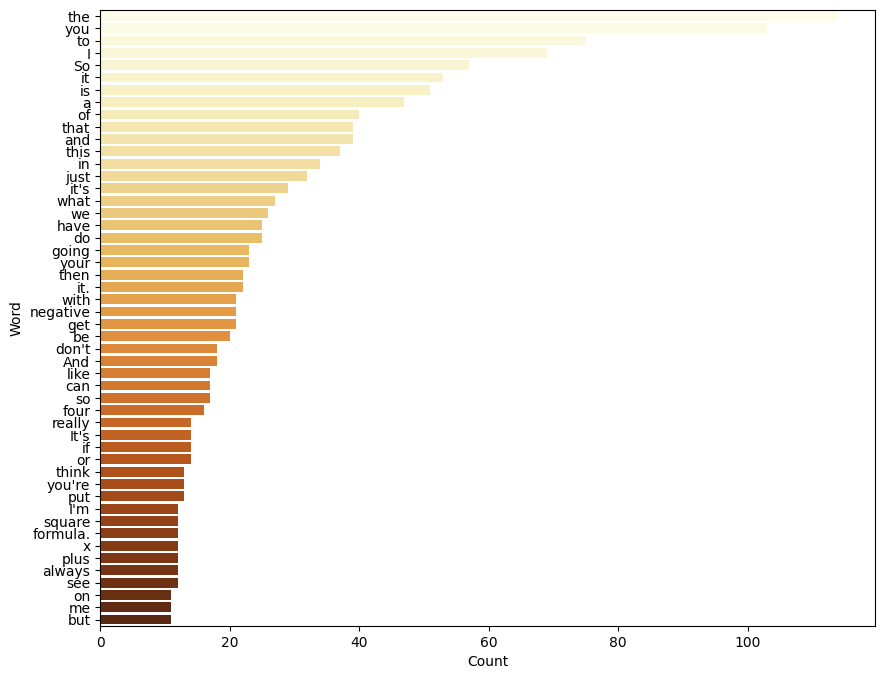

In [ ]:
all_words = " ".join(dv['Utterance']).split()
top_k_words = pd.Series(all_words).value_counts()[:50]

palette= sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(10, 8))
p = sns.barplot(x=top_k_words.values, y=top_k_words.index,  hue = list(range(len(top_k_words.index))), palette=palette, orient='h')
p.legend_.remove()
plt.xlabel("Count")
plt.ylabel("Word");